#KNN CLASSIFIER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Assignments/KNN Classifier/Zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


- animal_name: (string) Name of the animal
- hair: (integer) 0: No, 1: Yes - Whether the animal has hair
- feathers: (integer) 0: No, 1: Yes - Whether the animal has feathers
- eggs: (integer) 0: No, 1: Yes - Whether the animal lays eggs
- milk: (integer) 0: No, 1: Yes - Whether the animal produces milk
- airborne: (integer) 0: No, 1: Yes - Whether the animal is capable of flight
- aquatic: (integer) 0: No, 1: Yes - Whether the animal is aquatic
- predator: (integer) 0: No, 1: Yes - Whether the animal is a predator
- toothed: (integer) 0: No, 1: Yes - Whether the animal has teeth
- backbone: (integer) 0: No, 1: Yes - Whether the animal has a backbone
- breathes: (integer) 0: No, 1: Yes - Whether the animal breathes air
- venomous: (integer) 0: No, 1: Yes - Whether the animal is venomous
- fins: (integer) 0: No, 1: Yes - Whether the animal has fins
- legs: (integer) Number of legs the animal has (0, 2, 4, 5, 6, 8)
- tail: (integer) 0: No, 1: Yes - Whether the animal has a tail
- domestic: (integer) 0: No, 1: Yes - Whether the animal is typically kept as a domestic pet
- catsize: (integer) 0: No, 1: Yes - Whether the animal is roughly the size of a cat
- class_type: (integer) Class of the animal (1-7), where:
  - 1: Mammal
  - 2: Bird
  - 3: Reptile
  - 4: Fish
  - 5: Amphibian
  - 6: Bug
  - 7: Invertebrate

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


- No Null Values Present in the data


In [4]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


This Description Says:
- 42.5% animal are having Hair
- 19.8% animals are having feathers
- 58.4% animals lays eggs
- 40.5% animals give milk
- 23% animals can fly
- 35.6 % animals can swim
- 55.4% ainmals are predators
- 60.3% animals are toothed
- 82.1% animals have backbone/spine
- 79.2% animals can  breathe
- 8% animals are venomous
- 16% animals have fins
- on an Average there are animal with 2 or more legs
- 74.2& animals have tail
- 12.8% animals are domestic
- 43.5% animals are cat sized
- And overall the animals mostly are type 2 or type 3

In [5]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
data[data.duplicated(keep=False)]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


- Clearly there are No Null Values and No Duplicate Values in the dataset

### Visualizations

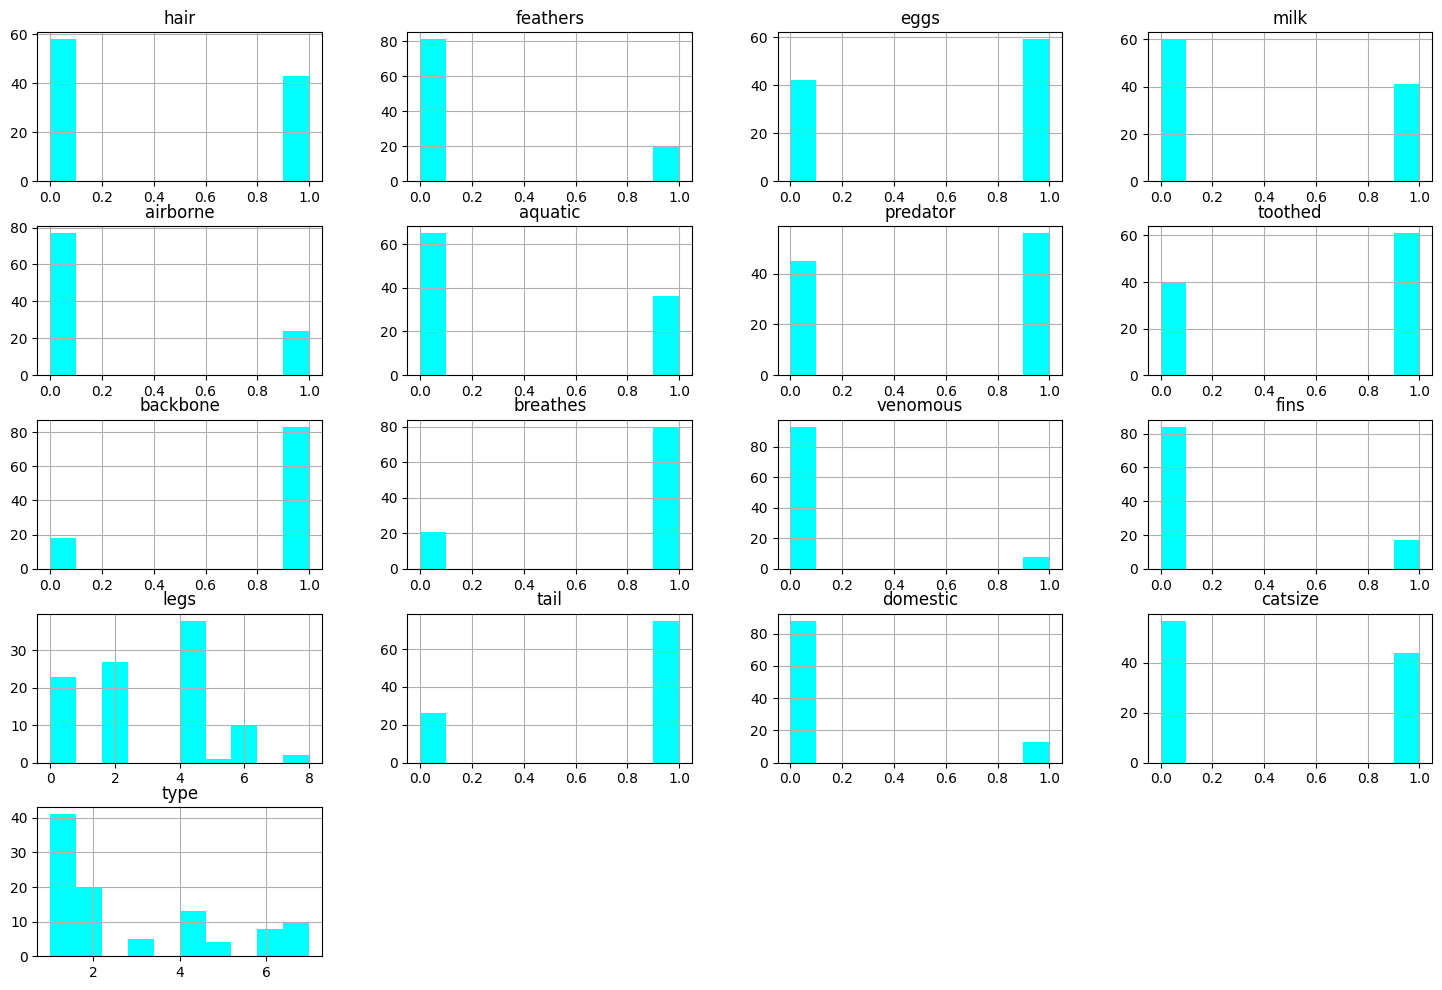

In [7]:
#PLotting the histogrmas to understand the data distribution
data.hist(figsize=(18,12),color="cyan")
plt.title("Histograms for the dataset")
plt.show()

- This bar chart representation of the daa makes sense as the data is in all 0's and 1's for most attributes and no continous data for all the columns

lets try to plot different visualizations to see any relations or patterns in the dataset

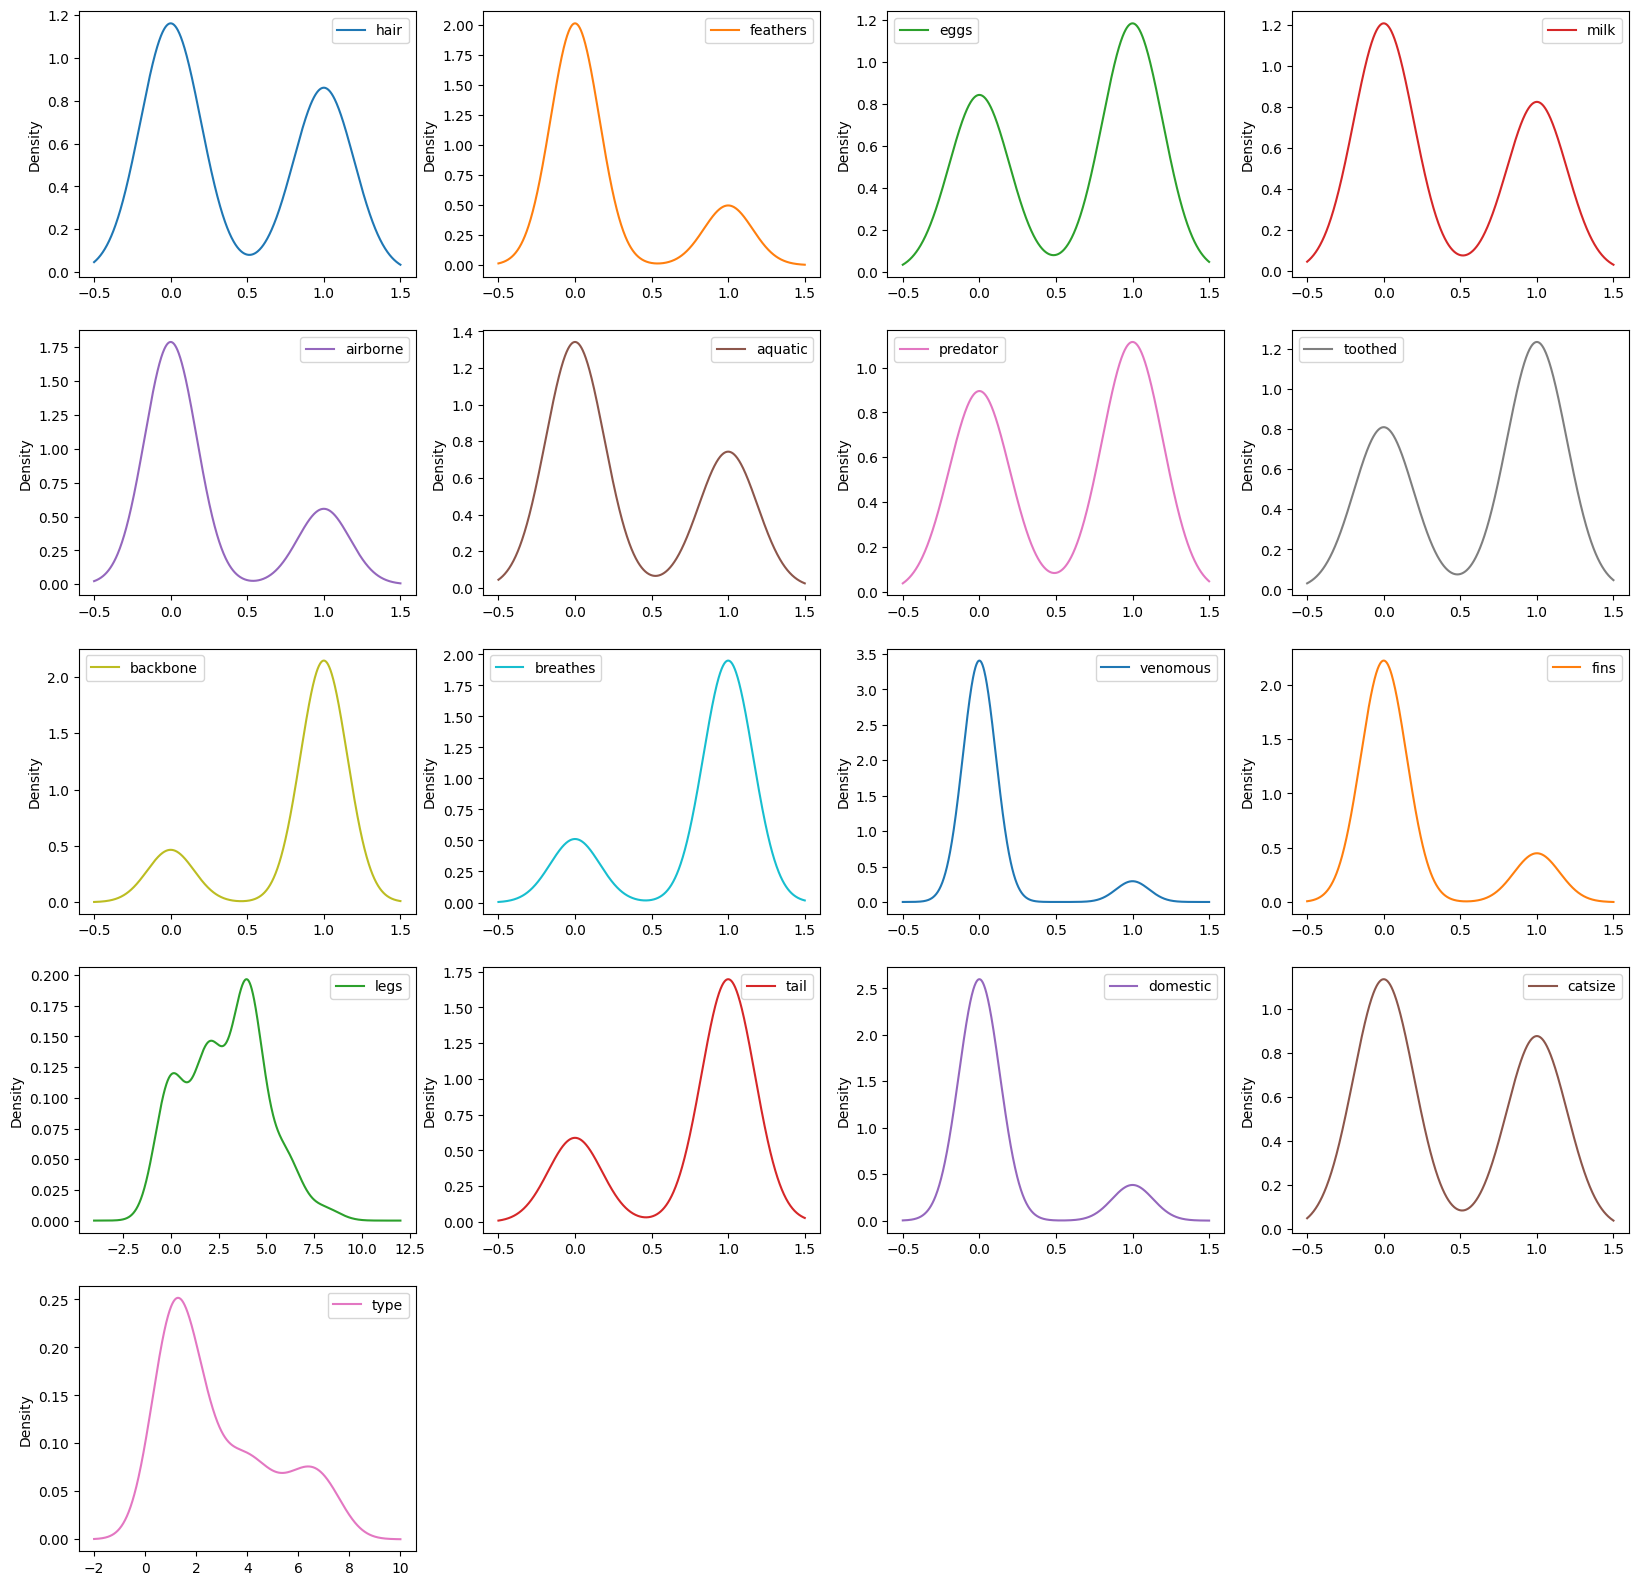

In [8]:
# Plotting the Density PLots to identify if the data distribution is skewed are not
data.plot(kind='density', subplots=True, layout=(5, 4), figsize=(20, 20), sharex=False)
plt.title("The KDE Plots for the data attributes")
plt.show()

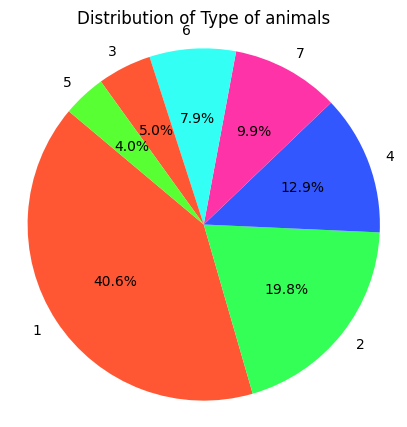

In [9]:
# Let's PLot the pie chart to get te percentage of different types present in the dataset
num_counts = data['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#33FFF5', '#FF5733', '#57FF33'])
plt.title('Distribution of Type of animals')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- The Data shows that
  - 40.6% animals are type 1 [Mammals]
  - 19.8% animals are type 2 [ Bird ]
  - 5.0% animals are type 3 [ Reptile ]
  - 12.9% animals are type 4 [ Fish ]
  - 4.0% animals are type 5 [ Amphibian ]
  - 7.95 animals are type 6 [ Bug ]
  - 9.9% animals are type 7 [Invertebrate]

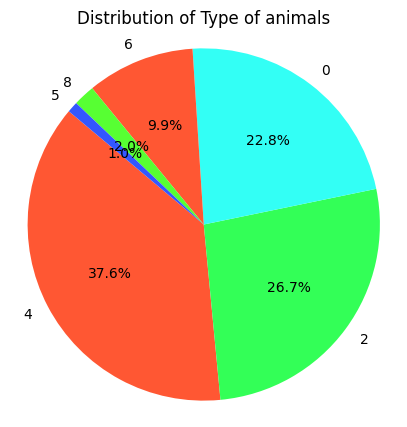

In [10]:
# Let's PLot the pie chart to get te percentage of different types with how many legs present in the dataset
num_counts_1 = data['legs'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts_1, labels=num_counts_1.index, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#33FFF5', '#FF5733', '#57FF33', '#3357FF', '#FF33A8'])
plt.title('Distribution of Type of animals')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- 22.8% animals with 0 legs
- 26.7% animals with 2 legs
- 37.6% animals with 4 legs
- 1.0% animals with 5 legs
- 9.9% animals with 6 legs
- 2.0% animals with 8 legs

In [11]:
# Check for animals with 5 legs
animals_with_5_legs = data[data['legs'] == 5]

# Display the result
print(animals_with_5_legs)

   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
85    starfish     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
85        0         0         0         0     0     5     0         0   

    catsize  type  
85        0     7  


In [14]:
 #Group by the number of legs and count the number of animals in each group
legs_group = data.groupby('legs').size().reset_index(name='count')

# Display the grouped data
print(legs_group)

   legs  count
0     0     23
1     2     27
2     4     38
3     5      1
4     6     10
5     8      2


In [15]:
hair_group = data.groupby('hair').size().reset_index(name='count')

# Display the grouped data
print(hair_group)

   hair  count
0     0     58
1     1     43


let's have pie chart visualization of some the attributes

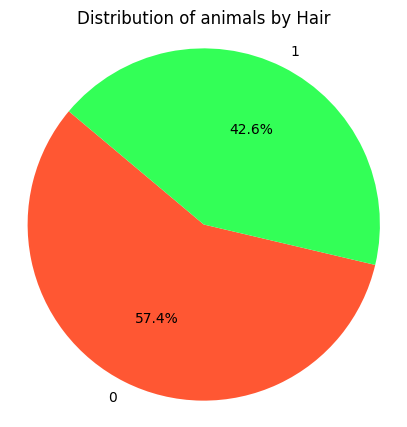

In [17]:
num_counts_2 = data['hair'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts_2, labels=num_counts_2.index, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#33FFF5', '#FF5733', '#57FF33', '#3357FF', '#FF33A8'])
plt.title('Distribution of animals by Hair')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
data.head(1)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [21]:
group1=data.groupby(["type","predator"]).size().reset_index(name='count')
group1

,type,predator,count
0,1,0,19
1,1,1,22
2,2,0,11
3,2,1,9
4,3,0,1
5,3,1,4
6,4,0,4
7,4,1,9
8,5,0,1
9,5,1,3


- this gives us te amount of predators per each type of animal lets have a bar chart visualization for this

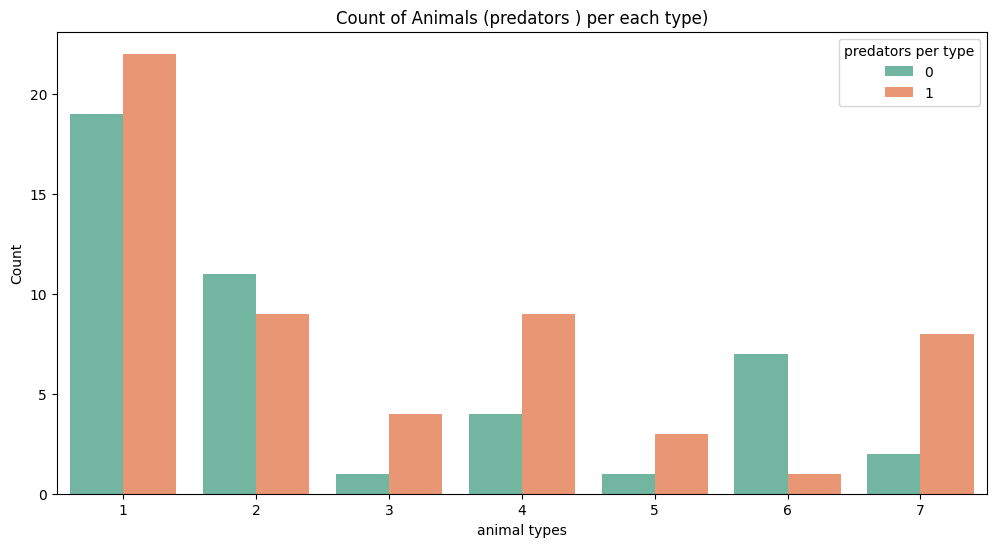

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='type', hue='predator', palette='Set2')

# Add labels and title
plt.xlabel('animal types')
plt.ylabel('Count')
plt.title('Count of Animals (predators ) per each type)')
plt.legend(title='predators per type', loc='upper right')

# Show the plot
plt.show()

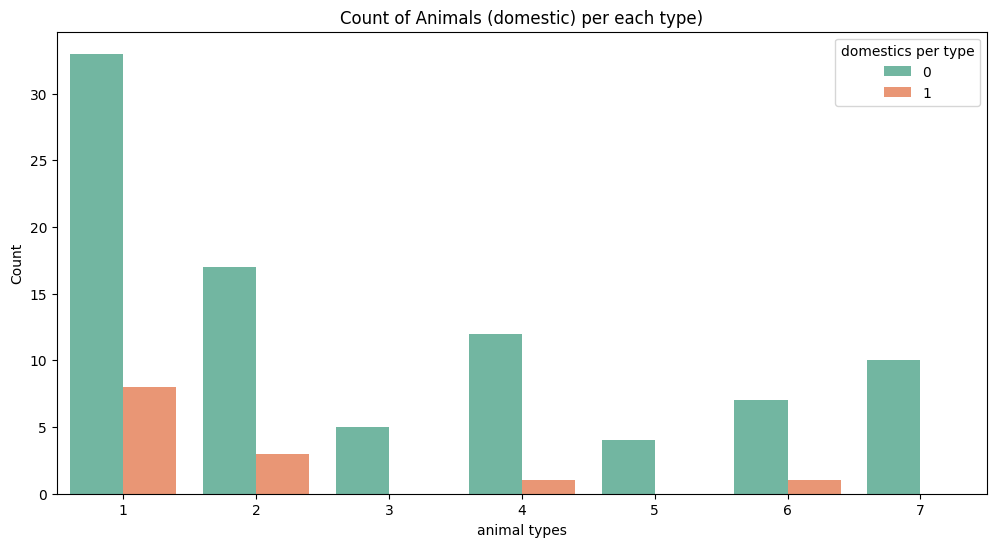

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='type', hue='domestic', palette='Set2')

# Add labels and title
plt.xlabel('animal types')
plt.ylabel('Count')
plt.title('Count of Animals (domestic) per each type)')
plt.legend(title='domestics per type', loc='upper right')

# Show the plot
plt.show()

In [27]:
group2=data.groupby(["type","domestic"]).size().reset_index(name='count')
group2

,type,domestic,count
0,1,0,33
1,1,1,8
2,2,0,17
3,2,1,3
4,3,0,5
5,4,0,12
6,4,1,1
7,5,0,4
8,6,0,7
9,6,1,1


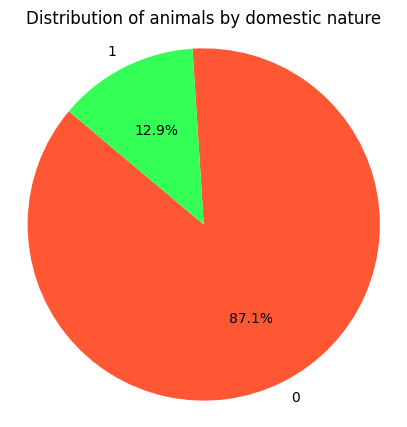

In [25]:
num_counts_3 = data["domestic"].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts_3, labels=num_counts_3.index, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#33FFF5', '#FF5733', '#57FF33', '#3357FF', '#FF33A8'])
plt.title('Distribution of animals by domestic nature')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- so the data says only 12.9% of the animals in the zoo are domestic in nature and others are not

In [26]:
group1=data.groupby(["hair","feathers"]).size().reset_index(name='count')
group1

,hair,feathers,count
0,0,0,38
1,0,1,20
2,1,0,43


<Axes: >

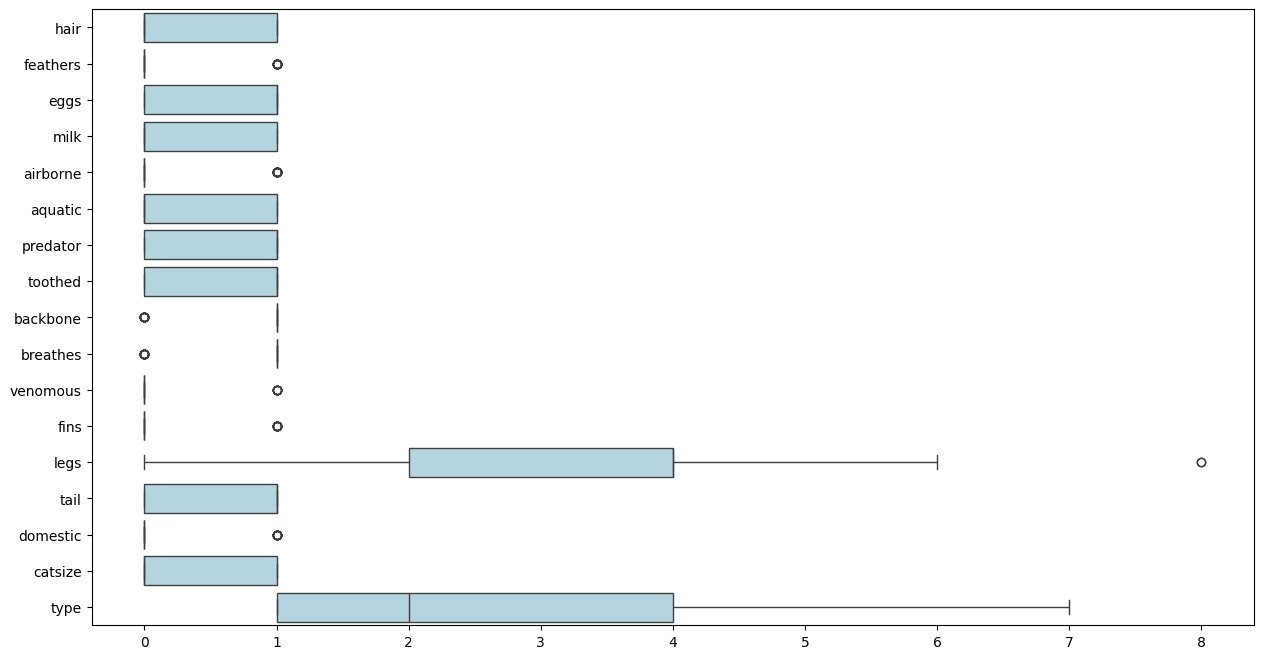

In [28]:
#Plotting the Box-Plot to see for the outliers the data has
plt.figure(figsize=(15,8))
sns.boxplot(data=data, orient="h", color="lightblue")

- Every data has one outlier apart from legs  each data has outleirs because they are encoded and it has one 0's and 1's so the 1's there are popped out as outliers in the box plot

In [29]:
# we are dropping the animal name column because it has very less significance in # classification apart from the other attributes in the data
# and with this we can also have a look at the correlation matrix and see if we can find any realtion or patterns between them
zoo=data.copy()

In [32]:
zoo_data=zoo.drop("animal name",axis=1)

In [34]:
zoo_data.head(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [35]:
#Finding the correlation matrix
correlation_matrix=zoo_data.corr()

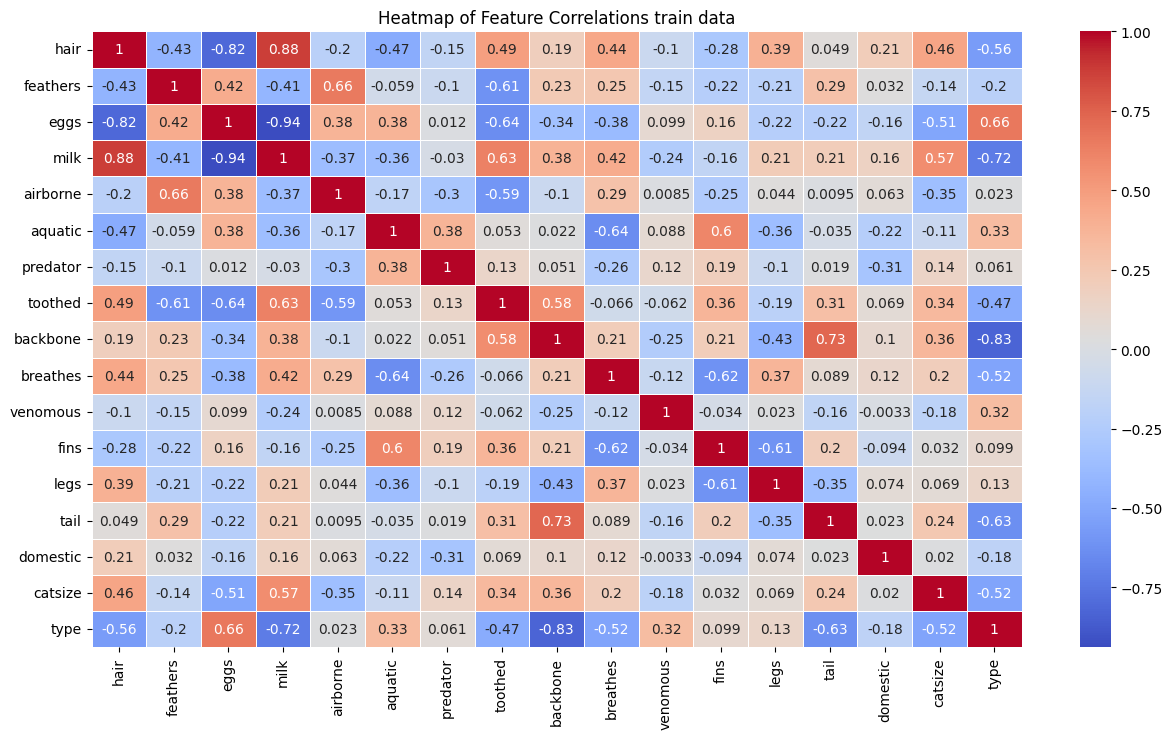

In [36]:
# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations train data')
plt.show()

- Strong Positive Correlations:

  - hair and milk (0.88): This suggests that the presence of hair is strongly associated with the presence of milk.
  - milk and catsize (0.57): Indicates a positive relationship between these features.
  - aquatic and fins (0.6): Indicates that aquatic creatures tend to have fins.



- Strong Negative Correlations:

  - hair and eggs (-0.82): This suggests that animals with hair are less likely to lay eggs.
  - milk and eggs (-0.94): This suggests that animals that produce milk are less likely to lay eggs.
  - backbone and type (-0.83): This suggests that there is a strong negative correlation between having a backbone and the type of animal.
  - milk and type (-0.72): Indicates that the presence of milk is negatively correlated with the type of animal.
  - hair and type (-0.56): Indicates a negative relationship between the presence of hair and the type of animal.
  - hair and feathers (-0.43): Indicates a negative correlation between the presence of hair and feathers.



- Interesting Observations:

  - feathers and eggs (0.42): This shows a positive correlation, suggesting that animals with feathers are likely to lay eggs.
  - feathers and airborne (0.66): This suggests that animals with feathers are likely to be capable of flight.
  - toothed and backbone (0.58): Suggests that animals with teeth are likely to have a backbone.
  - toothed and milk (0.63): Indicates a positive relationship between these features.
  - aquatic and breathes (-0.64): Indicates a negative correlation, suggesting aquatic animals are less likely to breathe air.



- Moderate Positive Correlations:

  - eggs and type (0.66): Indicates that animals laying eggs are associated with a particular type.
  - catsize and milk (0.57): Indicates a moderate positive correlation.

- Moderate Negative Correlations:

  - hair and type (-0.56): Indicates a moderate negative correlation.
  - catsize and type (-0.52): Indicates a moderate negative correlation.
  - aquatic and type (-0.63): Indicates a moderate negative correlation.

In [37]:
# Splitting the Data into Train and Test splits
from sklearn.model_selection import train_test_split

# Split the dataset
X = zoo_data.drop(columns=['type'])
y = zoo_data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### KNN Classification

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

# Train the classifier
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of K values and distance metrics to try
k_values = [3, 5, 7, 9]# initialising the k values
distance_metrics = ['euclidean', 'manhattan', 'minkowski']# initialising the distance metrics



In [41]:
# Initialize variables to store the best results
best_k = 5
best_metric = 'minkowski'
best_score = 0

for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        score = f1_score(y_test, y_pred, average='weighted')# till here it runs with every possiblity for both k values and distance metrics respectively
        if score > best_score:
            best_score = score
            best_k = k
            best_metric = metric
# it finalizes the best metric i terms of both best k value, best distance calculation metrics and best F1 score


In [42]:
print(f'Best K: {best_k}, Best Metric: {best_metric}, Best F1-Score: {best_score}')


Best K: 3, Best Metric: euclidean, Best F1-Score: 0.9333333333333333


#### Evaluating the classifiers performance

In [43]:
# Train the best model
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


In [44]:

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1-Score: 0.9333333333333333


### Decision boundaries of the classifier

Visualizing decision boundaries for KNN with high-dimensional data can be challenging. We will use PCA to reduce the dimensionality for visualization.

In [45]:
from sklearn.decomposition import PCA

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [46]:
# Train KNN on reduced data
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [47]:
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

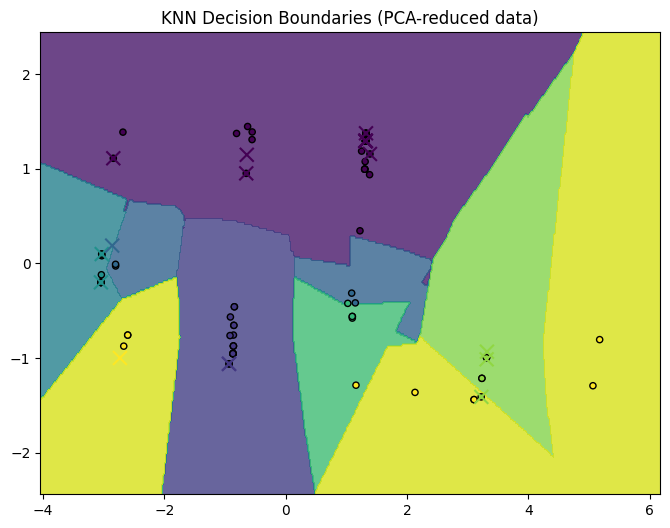

In [48]:
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', s=20)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='x', s=100)
plt.title("KNN Decision Boundaries (PCA-reduced data)")
plt.show()

in this decision boundary we can clearly see the classes there is a difference in shade when we observe clearly

**Interview Questions**

1) What are the key hyperparameters in KNN?

- The key hyperparameters in KNN are:
  - The number of neighbors (K)
  - The distance metric (e.g., Euclidean, Manhattan, Minkowski)
  - The weight function used in prediction (uniform or distance-based)

2) What distance metrics can be used in KNN?

- Common distance metrics used in KNN include:
  - Euclidean distance
  - Manhattan distance
  - Minkowski distance
  - Chebyshev distance
  - Hamming distance (for categorical data)